### Importing, loading and preprocessing the data

In [1]:
#Importing MNIST dataset
from keras.datasets import mnist

#Loading data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print("Shape of training data:- ",x_train.shape)
print("Shape of test data:- ",x_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step
Shape of training data:-  (60000, 28, 28)
Shape of test data:-  (10000, 28, 28)


In [2]:
#Reshaping the input images
from keras import backend as K

img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
print("Training data shape:- ",x_train.shape)
print("Test data shape:- ",x_test.shape)

Training data shape:-  (60000, 28, 28, 1)
Test data shape:-  (10000, 28, 28, 1)


In [0]:
#Data Normalization --> (x-x_min)/(x_max-x_min)
x_train = x_train/255
x_test = x_test/255

In [4]:
import pandas as pd
print("Frequency of each class labels in training data:-\n",pd.DataFrame(y_train)[0].value_counts())

Frequency of each class labels in training data:-
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [5]:
# Converting class vectors to binary class matrices
from keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#Function to plot train and test loss
import matplotlib.pyplot as plt
import seaborn as sns
def plt_dynamic(x, vy, ty,ti):
    sns.set_style('whitegrid')
    plt.plot(x, vl, 'r', label="Validation Loss")
    plt.plot(x, tl, 'b', label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Cross Entropy Loss")
    plt.legend()
    plt.title(ti)
    plt.show()

### Architecture-1:-  3 convolution layers

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,BatchNormalization

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_62 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 32)          0         
__________

In [44]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,y_train,batch_size = 256, epochs = 15, verbose = 1, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.2693 - acc: 0.9145 - val_loss: 0.1769 - val_acc: 0.9455
Epoch 2/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0803 - acc: 0.9754 - val_loss: 0.0825 - val_acc: 0.9745
Epoch 3/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0582 - acc: 0.9821 - val_loss: 0.0639 - val_acc: 0.9808
Epoch 4/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.0438 - acc: 0.9863 - val_loss: 0.0460 - val_acc: 0.9859
Epoch 5/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0287 - val_acc: 0.9910
Epoch 6/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0332 - acc: 0.9892 - val_loss: 0.0311 - val_acc: 0.9910
Epoch 7/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0293 - acc: 0.9904 - val_loss: 0.0268 - val_a

Test loss: 0.028260895690632604
Test accuracy: 0.9912


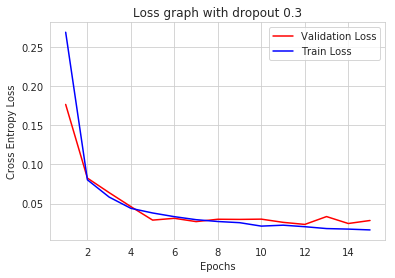

In [45]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,16))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl,"Loss graph with dropout 0.3")

Test loss: 0.023068634322978322
Test accuracy: 0.9923


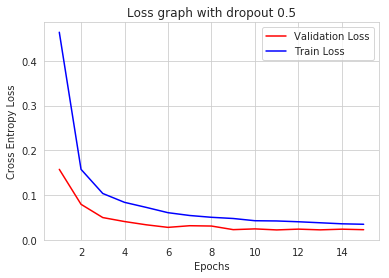

In [18]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,16))

vl = res.history['val_loss']
tl = res.history['loss']
va = res.history['val_acc']
ta = res.history['acc']
plt_dynamic(x, vl, tl,"Loss graph with dropout 0.5")

### Architecture-2: 5 convolution layers

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,BatchNormalization

model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
dropout_57 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
dropout_58 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 14, 14, 32)        128       
__________

In [41]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,y_train,batch_size = 256, epochs = 15, verbose = 1, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 234us/step - loss: 0.5208 - acc: 0.8352 - val_loss: 0.1786 - val_acc: 0.9434
Epoch 2/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.1443 - acc: 0.9540 - val_loss: 0.0799 - val_acc: 0.9743
Epoch 3/15
60000/60000 [==============================] - 9s 153us/step - loss: 0.0953 - acc: 0.9700 - val_loss: 0.0527 - val_acc: 0.9834
Epoch 4/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.0732 - acc: 0.9768 - val_loss: 0.0655 - val_acc: 0.9795
Epoch 5/15
60000/60000 [==============================] - 9s 151us/step - loss: 0.0609 - acc: 0.9808 - val_loss: 0.0335 - val_acc: 0.9894
Epoch 6/15
60000/60000 [==============================] - 9s 151us/step - loss: 0.0560 - acc: 0.9822 - val_loss: 0.0474 - val_acc: 0.9860
Epoch 7/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.0470 - acc: 0.9859 - val_loss: 0.0327 -

Test loss: 0.0170566019371312
Test accuracy: 0.9938


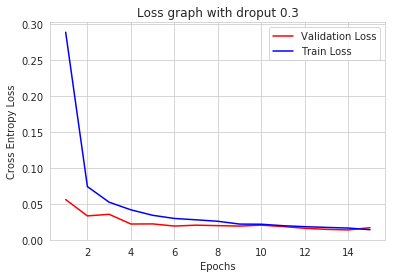

In [24]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,16))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl,"Loss graph with droput 0.3")

Test loss: 0.020840783670020756
Test accuracy: 0.9937


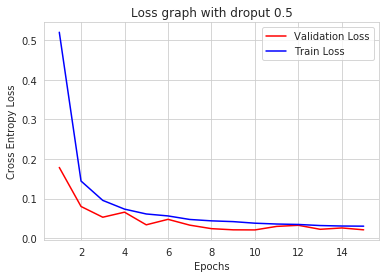

In [42]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,16))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl,"Loss graph with droput 0.5")

### Architecture-3: 7 Convolution layers

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,BatchNormalization

model = Sequential()
model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(7,7),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
dropout_45 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 32)        50208     
_________________________________________________________________
dropout_46 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        50208     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 14, 14, 32)        128       
__________

In [37]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,y_train,batch_size = 256, epochs = 12, verbose = 1, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 381us/step - loss: 0.3880 - acc: 0.8754 - val_loss: 0.1320 - val_acc: 0.9586
Epoch 2/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.0831 - acc: 0.9743 - val_loss: 0.0422 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0560 - acc: 0.9824 - val_loss: 0.0824 - val_acc: 0.9757
Epoch 4/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0448 - acc: 0.9864 - val_loss: 0.0428 - val_acc: 0.9858
Epoch 5/12
60000/60000 [==============================] - 18s 305us/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0328 - acc: 0.9893 - val_loss: 0.0232 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0300 - acc: 0.9906 - val_loss: 0.

Test loss: 0.01763540869842982
Test accuracy: 0.9938


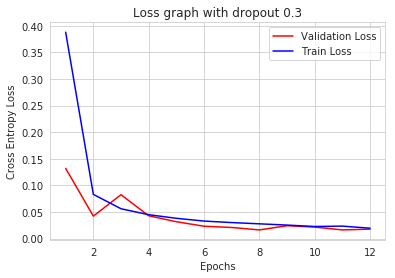

In [38]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,13))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl,"Loss graph with dropout 0.3")

Test loss: 0.03398916123464587
Test accuracy: 0.9905


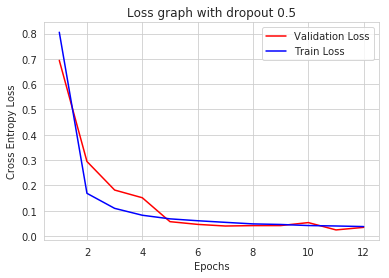

In [34]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,13))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl,"Loss graph with dropout 0.5")

### Conclusion

| Architecture | Training Loss | Train Accuracy | Test loss | Test Accuracy |
| - | - | - | - | - |
| 3 convolution layers(Dropout - 0.3) | 0.0162 | 0.9949 | 0.0283 | 0.9912 |
| 3 convolution layers(Dropout - 0.5) | 0.0352 | 0.9885 | 0.0231 | 0.9923 |
| 5 convolution layers(Dropout - 0.3) | 0.0142 | 0.9951 | 0.0171 | 0.9938 |
| 5 convolution layers(Dropout - 0.5) | 0.0301 | 0.9906 | 0.0208 | 0.9937 |
| 7 convolution layers(Dropout - 0.3) | 0.0194 | 0.9937 | 0.0176 | 0.9938 |
| 7 convolution layers(Dropout - 0.5) | 0.0372 | 0.9882 | 0.0340 | 0.9905 |


When droput rate is lesser train and test loss are converging at lower epochs only in contrast to higher dropout rate(0.5).